In [2]:
%pylab inline
import pandas as pd

rc('text', usetex=True, fontsize=20)

Populating the interactive namespace from numpy and matplotlib


In [3]:
### --------------- tau10E5 --------------- ###

vrots = [0,100,200,300]
vouts = [100,200,300]

all_x_frec = []
vrot_labs = []
vout_labs = []

for vrot in vrots:
    for vout in vouts:
        df = pd.read_csv('../data/tau10E5/vrot'+str(vrot)+'/vout'+str(vout)+'/tau10E5_vrot'+str(vrot)+'_vout'+str(vout)+'_out.ascii', delimiter=' ')
        escaped = df['escaped']
        x_frec = df['x_frec']
        x_frec_escaped = array(x_frec)[where(escaped == 0)[0]]
        
        all_x_frec.append(x_frec_escaped)
        vrot_labs.append(vrot)
        vout_labs.append(vout)

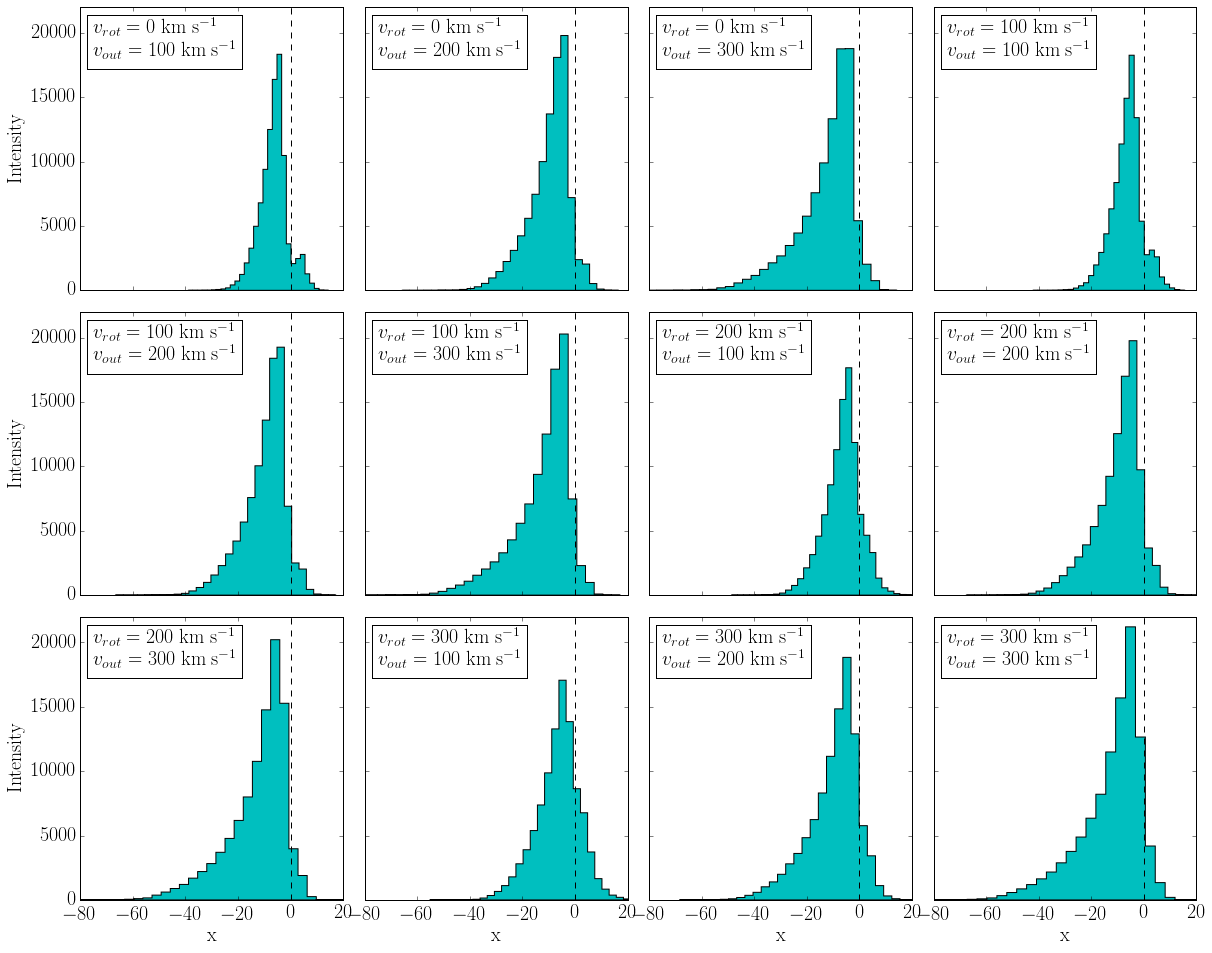

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = figure(1, (20., 16.))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (3, 4), # creates 3x4 grid of axes
                axes_pad=0.3, # pad between axes in inch.
                aspect=False,)

props = dict(boxstyle='square', facecolor='white')

for i in range(12):
    current_x = array(all_x_frec[i])
    vrot_lab = r'${0:.0f}$'.format(vrot_labs[i])
    vout_lab = r'${0:.0f}$'.format(vout_labs[i])
    lab = '$v_{rot}=$ '+vrot_lab+' $\mathrm{km}$ $\mathrm{s^{-1}}$ \n $v_{out}=$ '+vout_lab+' $\mathrm{km}$ $\mathrm{s^{-1}}$'
    
    grid[i].hist(current_x, bins=30, histtype='stepfilled', color='c')
    grid[i].axvline(x=0, ymin=0, ymax=22000, c='k', linestyle='--')
    grid[i].set_xlim(-80,20)
    grid[i].set_ylim(0,22000)
    grid[i].set_ylabel('$\mathrm{Intensity}$')
    grid[i].set_xlabel('$\mathrm{x}$')
    grid[i].text(-75,18000, lab, fontsize=20, bbox=props)
    
savefig('./tau10E5.png', format='png', transparent=False)